## Análisis de mercado prepago en Tigo 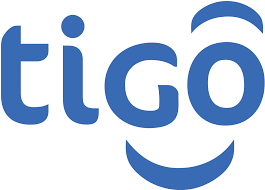

In [2]:
# Importar Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
data = pd.read_excel("Base.xlsx")
data

,Operador,Region,Canal,Mes,Año,DN,Ventas volumen,Peso Canal Volumen,Ventas valor,Peso Canal Valor,Paquetes,Destajo,Regarga promedio
0,WOM,Costa,SUPERMERCADOS,Junio,2020.0,0.040663,100.094414,0.001694,7.031864e+05,0.003860,0.000000,1.000000,7025.230965
1,WOM,Costa,SUPERMERCADOS,Mayo,2020.0,0.044222,114.834976,0.002099,8.793596e+05,0.004712,0.000000,1.000000,7657.593458
2,WOM,Costa,SUPERMERCADOS,Octubre,2020.0,0.031375,134.563309,0.002128,1.030106e+06,0.004610,0.000000,1.000000,7655.175544
3,WOM,Costa,SUPERMERCADOS,Agosto,2020.0,0.053847,137.840240,0.001852,7.829061e+05,0.003026,0.000000,1.000000,5679.807724
4,WOM,Centro,SUPERMERCADOS,Septiembre,2020.0,0.016696,143.463776,0.002505,4.282133e+05,0.002176,0.000000,1.000000,2984.818149
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6436,WOM,País,REGION,Agosto,2021.0,0.135040,NaN,NaN,NaN,NaN,0.531118,0.468882,NaN
6437,WOM,País,REGION,Septiembre,2021.0,0.124462,NaN,NaN,NaN,NaN,0.516549,0.483451,NaN
6438,WOM,País,REGION,Octubre,2021.0,0.143708,NaN,NaN,NaN,NaN,0.559194,0.440806,NaN
6439,WOM,País,REGION,Noviembre,2021.0,0.144462,NaN,NaN,NaN,NaN,0.573031,0.426969,NaN


Descripción de la base de datos: 

- Operador: Nombre del operador 
- Región: Nombre de cada una de las 6 regiones 
- Ventas volumen: Cantidad de recargas vendidas 
- Ventas valor: Dinero recaudado en pesos colombianos por la venta de recargas 
- Peso canal valor: Porcentaje de dinero que se recauda en ese canal 
- Peso canal volumen: Porcentaje de la cantidad de recargas que se realizaron en ese canal 
- DN: Porcentaje de puntos de venta en los que se puede hacer una recarga del operador en ese canal 
- Paquetes: Porcentaje de recargas que se hicieron en paquetes.
- Destajo: Porcentaje de recargas que se hicieron en recarga.

In [4]:
data.columns

Index(['Operador', 'Region', 'Canal', 'Mes', 'Año', 'DN', 'Ventas volumen',
       'Peso Canal Volumen', 'Ventas valor', 'Peso Canal Valor', 'Paquetes',
       'Destajo', 'Regarga promedio'],
      dtype='object')

In [5]:
data.dtypes #Conocer de que tipo son las variables

Operador               object
Region                 object
Canal                  object
Mes                    object
Año                   float64
DN                    float64
Ventas volumen        float64
Peso Canal Volumen    float64
Ventas valor          float64
Peso Canal Valor      float64
Paquetes              float64
Destajo               float64
Regarga promedio      float64
dtype: object

In [6]:
data.shape #Número de filas y columnas del dataset.

(6441, 13)

In [10]:
# Tipo de datos y missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6441 entries, 0 to 6440
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Operador            6440 non-null   object 
 1   Region              6440 non-null   object 
 2   Canal               6440 non-null   object 
 3   Mes                 6440 non-null   object 
 4   Año                 6440 non-null   float64
 5   DN                  4508 non-null   float64
 6   Ventas volumen      6320 non-null   float64
 7   Peso Canal Volumen  6319 non-null   float64
 8   Ventas valor        6319 non-null   float64
 9   Peso Canal Valor    6319 non-null   float64
 10  Paquetes            5635 non-null   float64
 11  Destajo             5635 non-null   float64
 12  Regarga promedio    6319 non-null   float64
dtypes: float64(9), object(4)
memory usage: 654.3+ KB


In [11]:
# se eanaliza la estadistica general de la data
data.describe()

,Año,DN,Ventas volumen,Peso Canal Volumen,Ventas valor,Peso Canal Valor,Paquetes,Destajo,Regarga promedio
count,6440.000000,4508.000000,6.320000e+03,6319.000000,6.319000e+03,6319.000000,5635.000000,5635.000000,6319.000000
mean,2020.478261,0.374006,6.236623e+05,0.145593,2.638431e+09,0.145593,0.520564,0.479436,4046.797651
std,0.499566,0.238614,1.354458e+06,0.102531,5.602581e+09,0.107485,0.232787,0.232787,995.958734
min,2020.000000,0.012038,3.500000e+01,0.001573,3.787172e+05,0.002010,0.000000,0.013764,963.283929
25%,2020.000000,0.165042,3.893275e+04,0.071963,1.335612e+08,0.070449,0.347088,0.281118,3389.144012
50%,2020.000000,0.314959,1.557565e+05,0.114909,5.997252e+08,0.117937,0.576452,0.423548,4118.302064
75%,2021.000000,0.558864,5.574387e+05,0.200653,2.310359e+09,0.199542,0.718882,0.652912,4696.479016
max,2021.000000,0.936953,1.283720e+07,0.601765,4.638424e+10,0.664167,0.986236,1.000000,9253.522853


Se buscan valores duplicados

In [12]:
# Validar si las variables contiene valores duplicados
duplicados = data.duplicated()
#print(duplicados)
data[duplicados]

,Operador,Region,Canal,Mes,Año,DN,Ventas volumen,Peso Canal Volumen,Ventas valor,Peso Canal Valor,Paquetes,Destajo,Regarga promedio


#### Se evidencia que no existen valores duplicados

### Se buscan valores perdidos

In [13]:
data.isna() # llamamos isna y obtenemos un booleano para cada valor, que indica si falta el valor o no, pero esto no es muy útil cuando trabajamos con muchos datos

,Operador,Region,Canal,Mes,Año,DN,Ventas volumen,Peso Canal Volumen,Ventas valor,Peso Canal Valor,Paquetes,Destajo,Regarga promedio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6436,False,False,False,False,False,False,True,True,True,True,False,False,True
6437,False,False,False,False,False,False,True,True,True,True,False,False,True
6438,False,False,False,False,False,False,True,True,True,True,False,False,True
6439,False,False,False,False,False,False,True,True,True,True,False,False,True


In [14]:
data.isna().any() # encadenamos isna con any y obtenemos un valor para cada variable

Operador              True
Region                True
Canal                 True
Mes                   True
Año                   True
DN                    True
Ventas volumen        True
Peso Canal Volumen    True
Ventas valor          True
Peso Canal Valor      True
Paquetes              True
Destajo               True
Regarga promedio      True
dtype: bool

#### Se encuentran valores perdidos, se suma el total de valores por variable. 

In [15]:
data.isna().sum() # combinar isna con sum cuenta el número de NaN en cada columna 

Operador                 1
Region                   1
Canal                    1
Mes                      1
Año                      1
DN                    1933
Ventas volumen         121
Peso Canal Volumen     122
Ventas valor           122
Peso Canal Valor       122
Paquetes               806
Destajo                806
Regarga promedio       122
dtype: int64

In [16]:
# porcetaje de valores nulos en la variable DN. Se evidencia que es de 30% por lo tanto se reduce a 70% la data, no se recomienda eliminar esta variable
1932/6440

0.3

In [17]:
# porcetaje de valores nulos en las variables Paquetes y Destajo. Se evidencia que es de 13% por lo tanto se reduce a 77% la data, no se recomienda eliminar esta variable
805/6440

0.125

In [18]:
# # porcetaje de valores nulos en las variables Ventas volumen, Peso Canal Volumen, Ventas valor y Peso Canal Valor.
# Se evidencia que es de 2% por lo tanto se reduce a 88% la data, 
# se recomienda eliminar esta variable ya que no es igual o mayor al 10% por lo tanto no afecta en la toma de decisiones
121/6440

0.018788819875776398

#### Vamos a visualizar los valores faltantes en el conjunto de datos usando un diagrama de barras

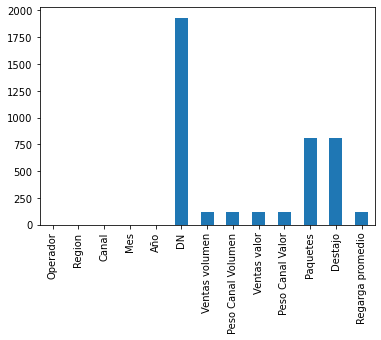

In [19]:
data.isna().sum().plot(kind='bar')
plt.show()

Ahora que sabemos que faltan valores en el conjunto de datos. ¿Qué haremos?
Tenemos varias opciones, eliminar los valores nulos con .dropna(), reemplazarlos por cero con .fillna(0), convertir a media. En este caso convertiré a media los que me arrojaron muchos nulos y los demás los voy a eliminar. Veamos... 

In [20]:
# Llenar los valores nulos con la media de cada columna. 
data['DN'] = data['DN'].fillna(data['DN'].median()) 
data['Paquetes'] = data['Paquetes'].fillna(data['Paquetes'].median()) 
data['Destajo'] = data['Destajo'].fillna(data['Destajo'].median()) 

In [21]:
data = data.dropna()

In [22]:
data.shape #Si se eliminan las filas y columnas donde hay datos faltantes el tamaño del dataset se reduce de: (6440, 12) a:

(6319, 13)

#### Vamos a visualizar que ya no tenemos valores faltantes en el conjunto de datos usando un diagrama de barras

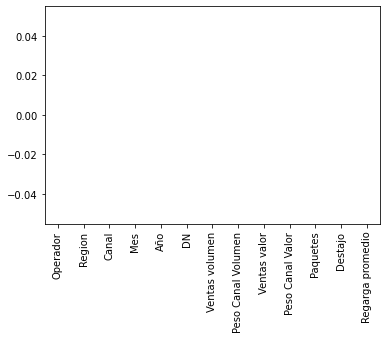

In [23]:
data.isna().sum().plot(kind='bar')
plt.show()

### Ahora si podemos trabajar con nuestros datos limpios

In [24]:
# 1. ¿Qué se puede esperar del mercado prepago para 2022?

data2 = data.groupby(['Canal', 'Año'], as_index=False).agg({'Ventas volumen':['sum', 'mean'], 'Ventas valor':['sum', 'mean']})
data2

Canal     Año Ventas volumen                Ventas valor  \
                                     sum          mean           sum   
0         AGENTES  2020.0   1.234757e+08  2.939897e+05  5.257039e+11   
1         AGENTES  2021.0   9.743080e+07  2.530670e+05  4.789625e+11   
2        APUESTAS  2020.0   2.707121e+08  6.445526e+05  1.277615e+12   
3        APUESTAS  2021.0   2.013559e+08  5.312822e+05  1.042623e+12   
4         CABINAS  2020.0   3.045118e+08  7.250281e+05  1.263134e+12   
5         CABINAS  2021.0   2.397739e+08  6.227893e+05  1.082107e+12   
6      DROGUERIAS  2020.0   1.568979e+08  3.735665e+05  6.143207e+11   
7      DROGUERIAS  2021.0   1.299132e+08  3.374369e+05  5.823181e+11   
8      PAPELERIAS  2020.0   1.383783e+08  3.294722e+05  5.740224e+11   
9      PAPELERIAS  2021.0   1.128193e+08  2.930372e+05  5.291169e+11   
10         REGION  2020.0   7.377673e+08  2.049354e+06  2.961245e+12   
11         REGION  2021.0   5.760781e+08  1.745691e+06  2.596167e+12   
12  SUPERMERCADOS  2020.0   5.285907e+07  1.258549e+05  1.261125e+11   
13  SUPERMERCADOS  2021.0   3.756540e+07  9.757246e+04  1.083319e+11   
14    TRADICIONAL  2020.0   4.287091e+08  1.020736e+06  1.541592e+12   
15    TRADICIONAL  2021.0   3.332976e+08  8.657080e+05  1.368875e+12   

                  
            mean  
0   1.251676e+09  
1   1.244058e+09  
2   3.041941e+09  
3   2.750985e+09  
4   3.007462e+09  
5   2.810668e+09  
6   1.462668e+09  
7   1.512515e+09  
8   1.366720e+09  
9   1.374330e+09  
10  8.225682e+09  
11  7.867174e+09  
12  3.002679e+08  
13  2.813816e+08  
14  3.670457e+09  
15  3.555519e+09

#### - Se observa que en el año 2021 tiende a bajar el volumen de sus ventas respecto al 2020.
#### - Si vemos los datos a nivel del canal por año observamos que en el canal de agentes ha aumentado su volumen de ventas, pero en este su valor de ventas no supera el año anterior.
#### - Si no se toman medidas de mercadeo para el 2022 quedara igual o bajarán las ventas
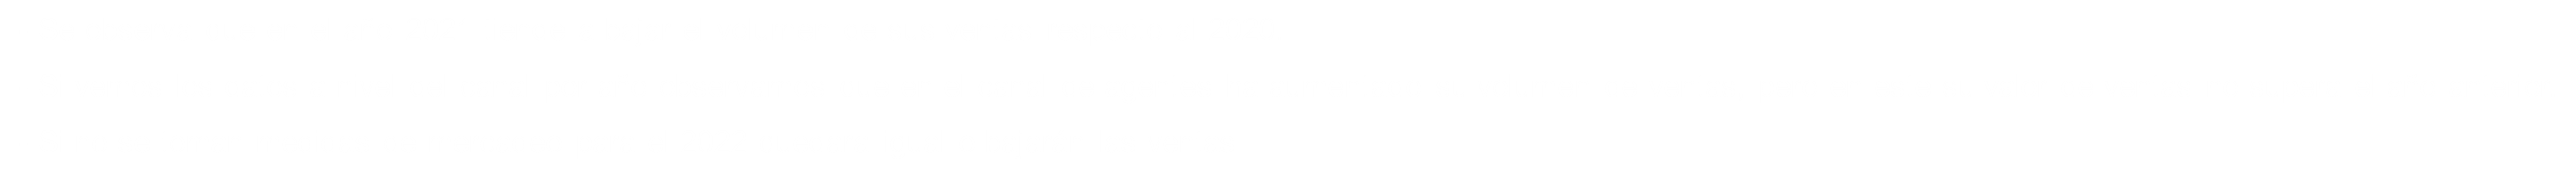

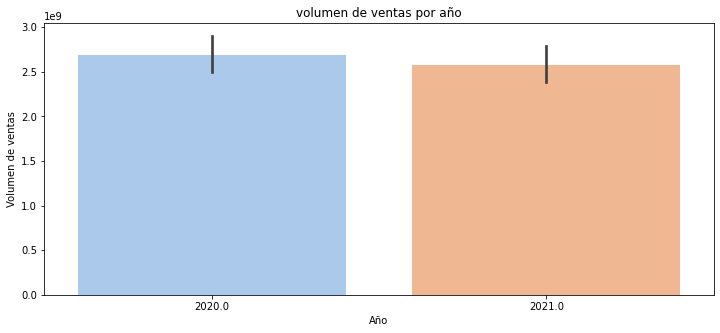

In [25]:
# Veamos algo de gráficas

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data = data
              , x = "Año"
              , y = "Ventas valor"
              , ax = ax, palette="pastel")
ax.set_title("volumen de ventas por año")
ax.set_xlabel("Año")
ax.set_ylabel("Volumen de ventas");

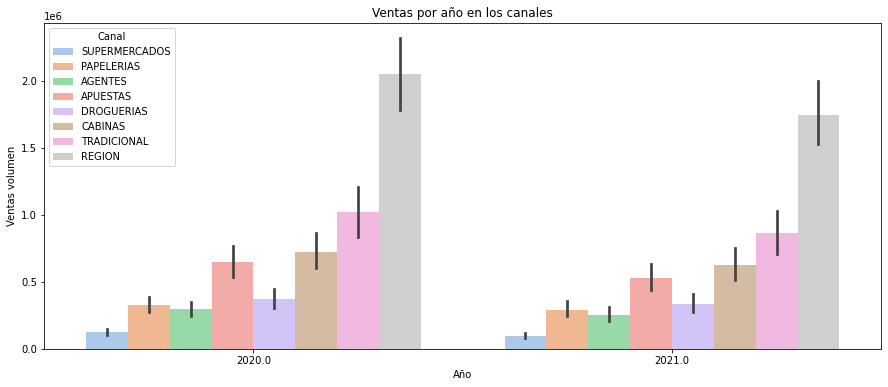

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data = data
              , x = "Año"
              , y = "Ventas volumen"
              , ax = ax, palette="pastel", hue = 'Canal')
ax.set_title("Ventas por año en los canales")
ax.set_xlabel("Año")
ax.set_ylabel("Ventas volumen");

In [27]:
# Cuantos registros tenemos por categoria de la columna 'Año'
data['Año'].value_counts()

2020.0    3300
2021.0    3019
Name: Año, dtype: int64

In [28]:
#2. ¿Cómo cree usted que fue el cierre del mercado prepago en el 2021?

ventasAnio = data.groupby(['Mes','Año'], as_index=False ).agg({'Ventas valor':['sum','mean'],'Ventas volumen':['sum','mean']})
ventasAnio

Mes     Año  Ventas valor               Ventas volumen  \
                                 sum          mean            sum   
0        Abril  2020.0  6.465287e+11  2.351013e+09   1.638608e+08   
1        Abril  2021.0  6.909990e+11  2.521894e+09   1.559809e+08   
2       Agosto  2020.0  7.370894e+11  2.680325e+09   1.800050e+08   
3       Agosto  2021.0  7.047238e+11  2.571985e+09   1.521831e+08   
4    Diciembre  2020.0  7.931403e+11  2.884147e+09   1.857452e+08   
5        Enero  2020.0  8.275536e+11  3.009286e+09   2.243969e+08   
6        Enero  2021.0  7.454465e+11  2.710714e+09   1.719430e+08   
7      Febrero  2020.0  7.895892e+11  2.871234e+09   2.115009e+08   
8      Febrero  2021.0  7.251708e+11  2.636985e+09   1.638014e+08   
9        Julio  2020.0  7.080177e+11  2.574610e+09   1.787833e+08   
10       Julio  2021.0  7.024238e+11  2.563591e+09   1.537820e+08   
11       Junio  2020.0  6.887719e+11  2.504625e+09   1.703035e+08   
12       Junio  2021.0  6.803808e+11  2.483141e+09   1.502847e+08   
13       Marzo  2020.0  7.688471e+11  2.795807e+09   2.025619e+08   
14       Marzo  2021.0  7.396193e+11  2.689525e+09   1.673922e+08   
15        Mayo  2020.0  6.146863e+11  2.235223e+09   1.557349e+08   
16        Mayo  2021.0  6.850245e+11  2.500090e+09   1.531948e+08   
17   Noviembre  2020.0  7.596404e+11  2.762329e+09   1.753852e+08   
18   Noviembre  2021.0  7.150106e+11  2.600038e+09   1.558915e+08   
19     Octubre  2020.0  7.858041e+11  2.857469e+09   1.840013e+08   
20     Octubre  2021.0  7.189646e+11  2.614417e+09   1.570058e+08   
21  Septiembre  2020.0  7.640778e+11  2.778465e+09   1.810323e+08   
22  Septiembre  2021.0  6.807382e+11  2.484446e+09   1.467749e+08   

                   
             mean  
0   595857.552279  
1   569273.253268  
2   654563.725239  
3   555412.739832  
4   675437.249320  
5   815988.719057  
6   625247.181723  
7   769094.345048  
8   595641.505303  
9   650121.247203  
10  561248.170516  
11  619285.385356  
12  548484.278911  
13  736588.709892  
14  608698.910325  
15  566308.851304  
16  559105.256224  
17  637764.254946  
18  566878.051098  
19  669095.605270  
20  570930.214122  
21  658299.425902  
22  535674.799383

Text(0.5, 1.0, 'Ventas en años 2020 y 2021')

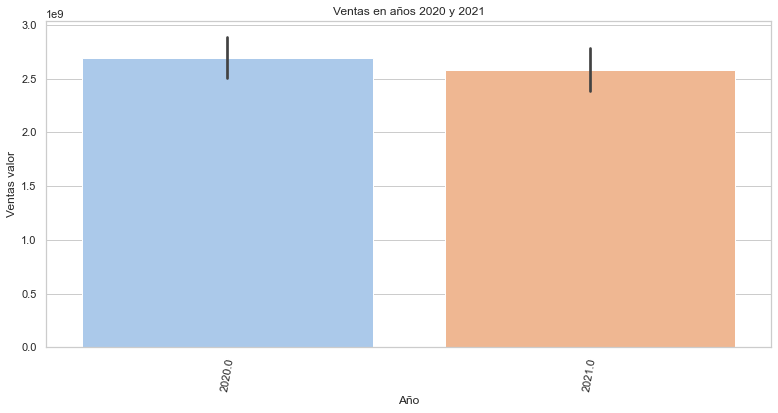

In [29]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(13,6))
sns.barplot(x='Año', y='Ventas valor', data=data,ax=axis, palette="pastel")
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Ventas en años 2020 y 2021')

#### - El cierre del mercado para el año 2021 fue menor en cuanto al año 2020, se analizan los meses de ambos años y el año 2021 muestra un comportamiento negativo con respecto al año 2020, no tenemos información del mes de diciembre del 2021.
#### - Debido a lo analizado anteriormente vemos un cierre de año 2021 negativo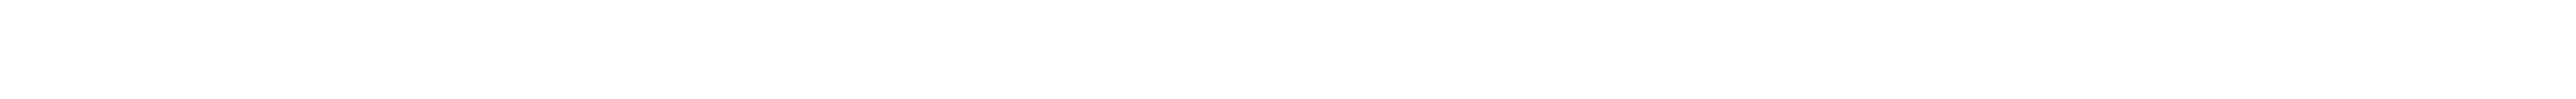

In [30]:
# 3.¿Debería impulsarse una estrategia que promueva el incremento de la recarga promedio o el incremento de la frecuencia de recargas?

data['recargaPromedio'] = data['Ventas valor']/data['Ventas volumen']
data.columns

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15116/2791625564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recargaPromedio'] = data['Ventas valor']/data['Ventas volumen']


Index(['Operador', 'Region', 'Canal', 'Mes', 'Año', 'DN', 'Ventas volumen',
       'Peso Canal Volumen', 'Ventas valor', 'Peso Canal Valor', 'Paquetes',
       'Destajo', 'Regarga promedio', 'recargaPromedio'],
      dtype='object')

In [31]:
Estrategia = data.groupby(['Año'], as_index=False ).agg({'recargaPromedio':['sum', 'mean'],'Ventas volumen':['sum', 'mean']})
Estrategia

Año recargaPromedio              Ventas volumen               
                      sum         mean            sum           mean
0  2020.0    1.272692e+07  3856.642470   2.213311e+09  670700.422568
1  2021.0    1.284479e+07  4254.651939   1.728234e+09  572452.550744

Text(0.5, 1.0, 'Recargas promedio en años 2020 y 2021')

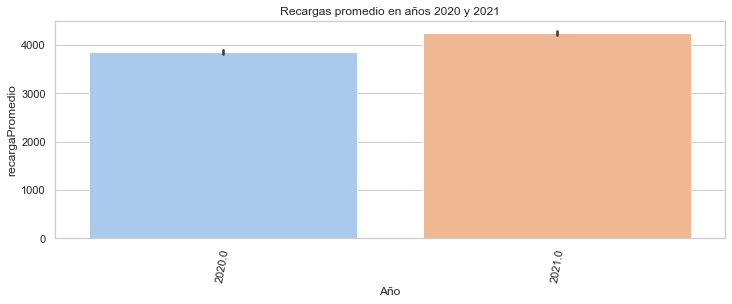

In [32]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(12,4))
sns.barplot(x='Año', y='recargaPromedio', data=data,ax=axis, palette="pastel")
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Recargas promedio en años 2020 y 2021')

Text(0.5, 1.0, 'Frecuencia de recargas en años 2020 y 2021')

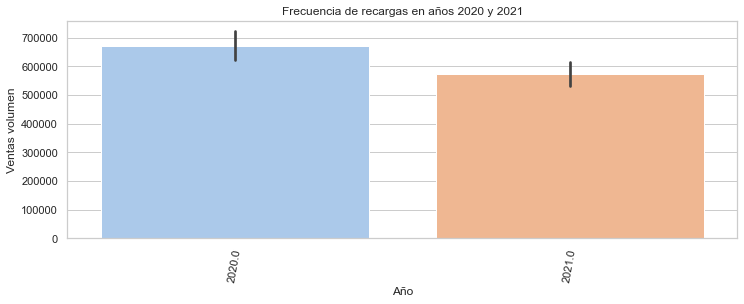

In [33]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(12,4))
sns.barplot(x='Año', y='Ventas volumen', data=data,ax=axis, palette="pastel")
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Frecuencia de recargas en años 2020 y 2021')

#### Se debe impulsar una estrategia de mercadeo para la frecuencia de recargas(Ventas volumen) ya que se evidencia que para el año 2021 ha bajado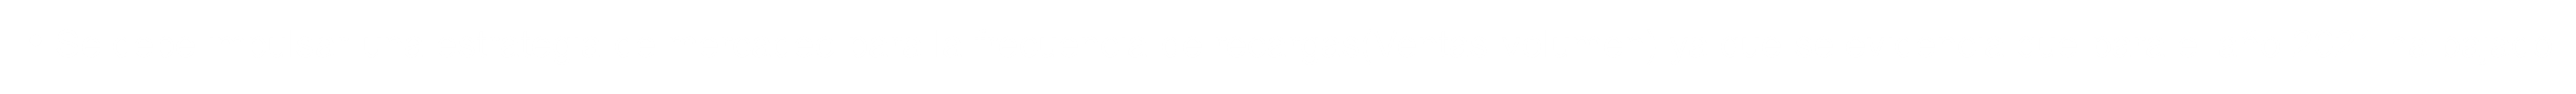

In [34]:
# 4. ¿Existen diferencias en los comportamientos de cada una de las regiones? 

# Cuantos registros tenemos por categoria de la columna 'Region' 
data['Region'].value_counts()

Costa        920
Pacífico     920
Antioquia    920
Oriente      920
Bogotá       920
Centro       914
País         805
Name: Region, dtype: int64

In [35]:
ventasRegion = data.groupby(['Region'], as_index=False ).agg({'Ventas valor':['sum', 'mean'],'Ventas volumen':['sum', 'mean']})
ventasRegion

Region  Ventas valor               Ventas volumen              
                       sum          mean            sum          mean
0  Antioquia  2.030367e+12  2.206920e+09   4.465368e+08  4.853661e+05
1     Bogotá  2.902309e+12  3.154684e+09   7.210744e+08  7.837765e+05
2     Centro  1.152341e+12  1.260767e+09   2.733982e+08  2.991228e+05
3      Costa  1.892240e+12  2.056783e+09   4.218034e+08  4.584820e+05
4    Oriente  1.702207e+12  1.850225e+09   4.162079e+08  4.523999e+05
5   Pacífico  1.435361e+12  1.560176e+09   3.486702e+08  3.789893e+05
6       País  5.557423e+12  6.903631e+09   1.313855e+09  1.632118e+06

Text(0.5, 1.0, 'Ventas por valor para cada región en años 2020 y 2021')

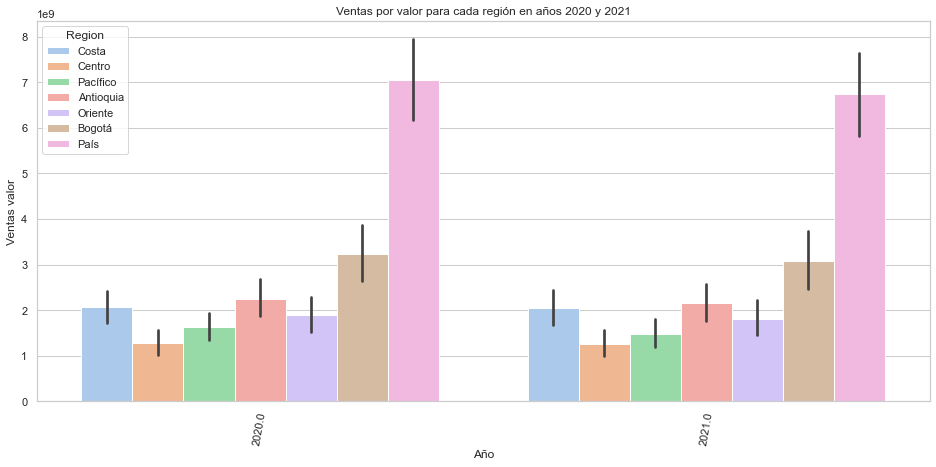

In [36]:

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Año', y='Ventas valor', data=data,ax=axis, palette="pastel", hue = 'Region')
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Ventas por valor para cada región en años 2020 y 2021')

Text(0.5, 1.0, 'Ventas por volumen para cada región en años 2020 y 2021')

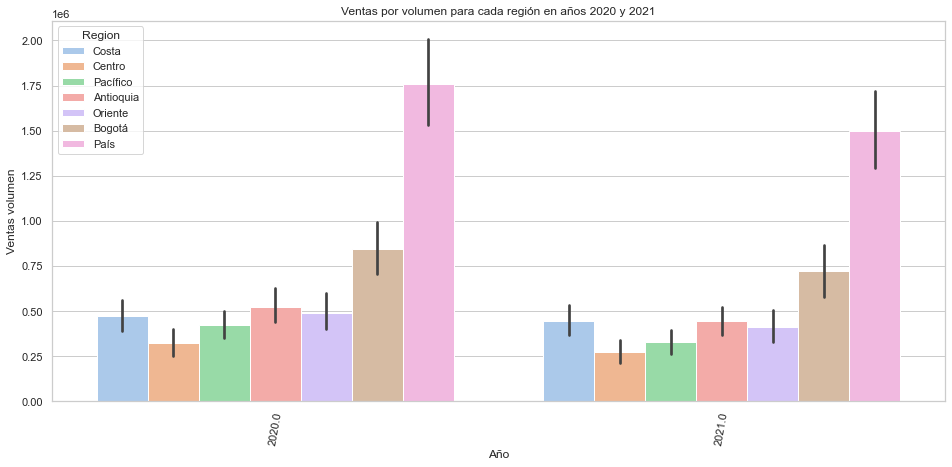

In [65]:

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Año', y='Ventas volumen', data=data,ax=axis, palette="pastel", hue = 'Region')
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Ventas por volumen para cada región en años 2020 y 2021')

#### Se evidencia que las regiones que mas ventas y mas volumen de ventas han tenido son:

- Bogota:2.902309e+12 
- Antioquía:2.030367e+12 

#### - Para las regiones centro, costa, pacifico y oriente se debe hacer un análisis de mercado, promocionar más, vallas publicitarias, etc.
#### - Para las regiones que tienen mas ventas fidelizar al cliente. 
#### - País: 5.557423e+12: hace referencia a las cifras totales o acumulada de todas las regiones por ello es el que mayor valor tiene

In [37]:
data2021 = data[data['Año'] == 2021]
data2021

,Operador,Region,Canal,Mes,Año,DN,Ventas volumen,Peso Canal Volumen,Ventas valor,Peso Canal Valor,Paquetes,Destajo,Regarga promedio,recargaPromedio
3360,WOM,Centro,SUPERMERCADOS,Noviembre,2021.0,0.033880,8.168443e+01,0.001573,4.314876e+05,0.002010,0.690492,0.309508,5282.372776,5282.372776
3361,WOM,Centro,SUPERMERCADOS,Agosto,2021.0,0.022927,1.424493e+02,0.004319,5.225329e+05,0.004844,0.548794,0.451206,3668.203193,3668.203193
3362,WOM,Centro,SUPERMERCADOS,Enero,2021.0,0.032096,1.479863e+02,0.003139,5.125413e+05,0.002916,0.000000,1.000000,3463.438560,3463.438560
3363,WOM,Centro,SUPERMERCADOS,Febrero,2021.0,0.031311,1.504030e+02,0.002931,3.787172e+05,0.002086,0.000000,1.000000,2518.016485,2518.016485
3364,WOM,Centro,SUPERMERCADOS,Septiembre,2021.0,0.027180,1.544279e+02,0.004313,6.005848e+05,0.005446,0.472116,0.527884,3889.094619,3889.094619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374,Claro,País,TRADICIONAL,Enero,2021.0,0.149243,9.803179e+06,0.276906,3.869005e+10,0.258270,0.720070,0.279930,3946.683918,3946.683918
6375,Claro,Bogotá,REGION,Marzo,2021.0,0.343680,9.949599e+06,0.287417,4.184665e+10,0.278578,0.733375,0.266625,4205.863264,4205.863264
6376,Claro,País,TRADICIONAL,Febrero,2021.0,0.147555,1.003189e+07,0.296272,3.955195e+10,0.268570,0.730702,0.269298,3942.622800,3942.622800
6377,Claro,País,TRADICIONAL,Marzo,2021.0,0.147162,1.013917e+07,0.292894,3.896401e+10,0.259388,0.725316,0.274684,3842.918245,3842.918245


In [38]:
# Cuantos registros tenemos por categoria de la columna 'Canal' 

data2021['Canal'].value_counts()

SUPERMERCADOS    385
PAPELERIAS       385
DROGUERIAS       385
AGENTES          385
CABINAS          385
TRADICIONAL      385
APUESTAS         379
REGION           330
Name: Canal, dtype: int64

In [41]:
# 5. ¿cuál o cuáles de los canales deberían ser más estratégicos para la compañía si quiere recuperarse para fin de 2021?

ventasCanal = data2021.groupby(['Canal'], as_index=False ).agg({'Ventas valor':['sum', 'mean'],'Ventas volumen':['sum', 'mean']})
ventasCanal

Canal  Ventas valor               Ventas volumen              
                           sum          mean            sum          mean
0        AGENTES  4.789625e+11  1.244058e+09   9.743080e+07  2.530670e+05
1       APUESTAS  1.042623e+12  2.750985e+09   2.013559e+08  5.312822e+05
2        CABINAS  1.082107e+12  2.810668e+09   2.397739e+08  6.227893e+05
3     DROGUERIAS  5.823181e+11  1.512515e+09   1.299132e+08  3.374369e+05
4     PAPELERIAS  5.291169e+11  1.374330e+09   1.128193e+08  2.930372e+05
5         REGION  2.596167e+12  7.867174e+09   5.760781e+08  1.745691e+06
6  SUPERMERCADOS  1.083319e+11  2.813816e+08   3.756540e+07  9.757246e+04
7    TRADICIONAL  1.368875e+12  3.555519e+09   3.332976e+08  8.657080e+05

Text(0.5, 1.0, 'Ventas por canal en el año 2021')

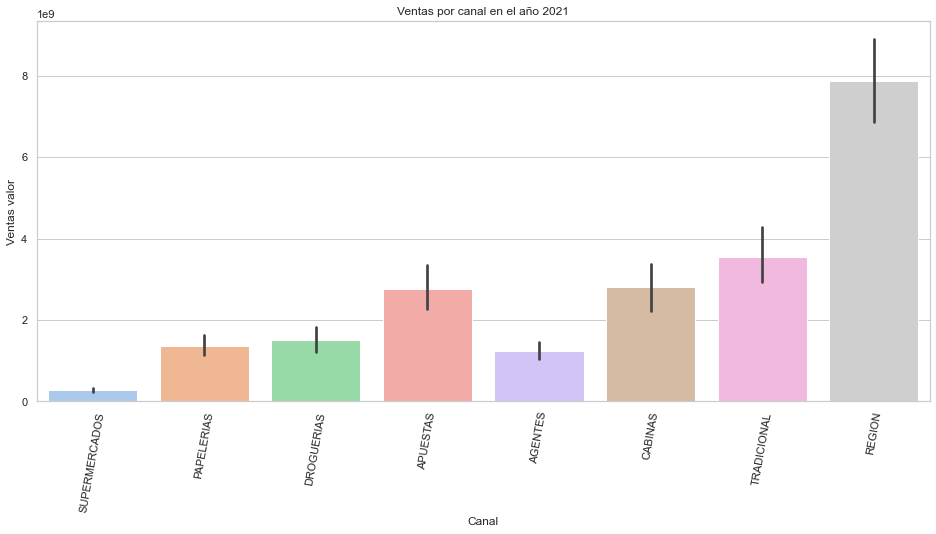

In [42]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Canal', y='Ventas valor', data=data2021,ax=axis, palette="pastel")
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Ventas por canal en el año 2021')

#### - Los canales tradicional, cabinas y apuestas son los más estratégicos, se deben fidelizar los clientes de estos canales
#### - Al canal agentes se aconseja aumentar el valor de las ventas de recarga, ya que vende bastantes pero el valor de ellas es pequeño 
#### - A los canales de  droguerías y papelerías se aconseja buscar aumentar tanto en volumen como el valor de las ventas
#### - Al canal supermercados se debe pensar una estrategia de mercado para subir tanto en valor de las ventas como en la cantidad de las ventas
#### -  El canal región: hace referencia a las cifras acumuladas de todos los canales dentro de la región por ello es el que tiene un valor más alto

In [43]:
ventasMes = data2021.groupby(['Mes'], as_index=False ).agg({'Ventas valor':'sum','Ventas volumen':'sum'})
ventasMes

,Mes,Ventas valor,Ventas volumen
0,Abril,6.909990e+11,1.559809e+08
1,Agosto,7.047238e+11,1.521831e+08
2,Enero,7.454465e+11,1.719430e+08
3,Febrero,7.251708e+11,1.638014e+08
4,Julio,7.024238e+11,1.537820e+08
5,Junio,6.803808e+11,1.502847e+08
6,Marzo,7.396193e+11,1.673922e+08
7,Mayo,6.850245e+11,1.531948e+08
8,Noviembre,7.150106e+11,1.558915e+08
9,Octubre,7.189646e+11,1.570058e+08


Text(0.5, 1.0, 'Ventas en mes 2021')

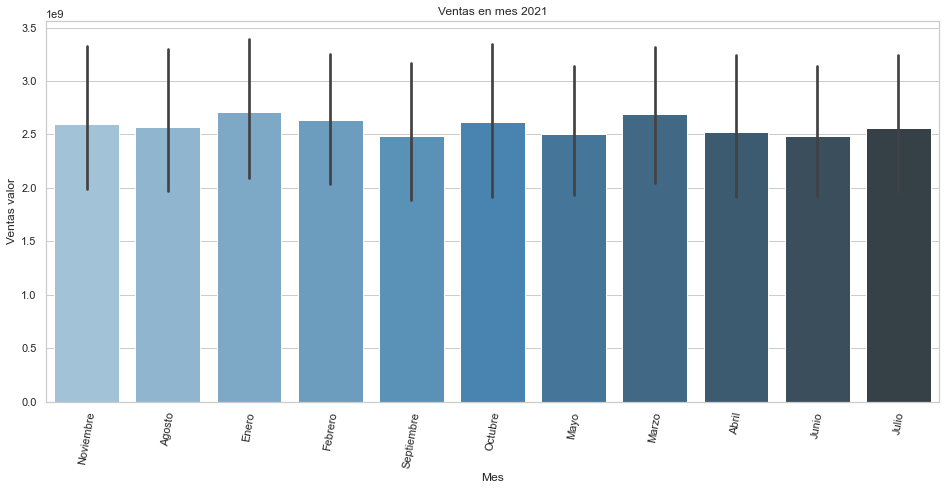

In [44]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Mes', y='Ventas valor', data=data2021,ax=axis, palette="Blues_d")
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Ventas en mes 2021')

#### En los meses de enero y marzo se evidencia mayor ventas

In [45]:
# Cuantos registros tenemos por categoria de la columna 'Region' sin nulos
data['Operador'].value_counts()

Otros       1265
Tigo        1265
Movistar    1265
Claro       1265
WOM         1259
Name: Operador, dtype: int64

In [46]:
ventasOperador = data.groupby(['Operador'], as_index=False ).agg({'Ventas valor':['sum','mean'],'Ventas volumen':['sum','mean']})
ventasOperador

Operador  Ventas valor               Ventas volumen              
                      sum          mean            sum          mean
0     Claro  1.006070e+13  7.953125e+09   2.437329e+09  1.926742e+06
1  Movistar  2.516844e+12  1.989600e+09   5.727793e+08  4.527899e+05
2     Otros  7.028688e+11  5.556275e+08   1.827773e+08  1.444880e+05
3      Tigo  3.170712e+12  2.506492e+09   6.855576e+08  5.419427e+05
4       WOM  2.211199e+11  1.756313e+08   6.310254e+07  5.012116e+04

Text(0.5, 1.0, 'Ventas en cada operador')

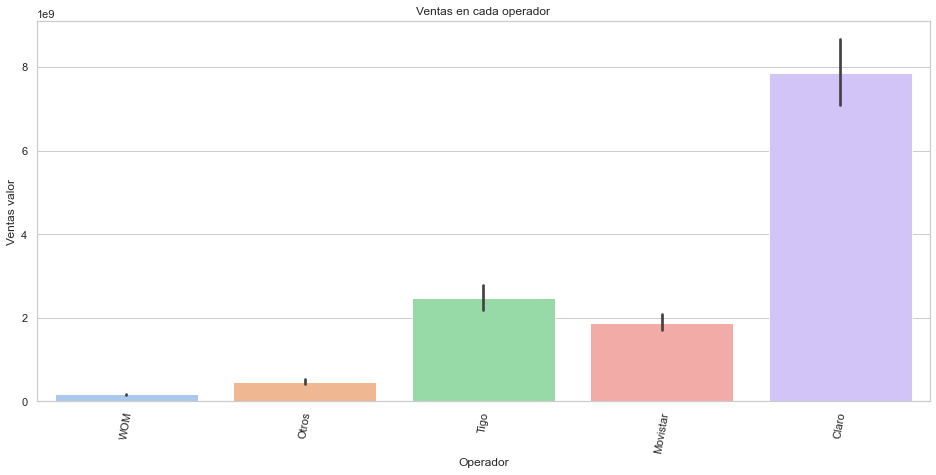

In [47]:
# Configurar el tema de la trama
sns.set(style='whitegrid')

figure,axis = plt.subplots(1 ,figsize=(16,7))
sns.barplot(x='Operador', y='Ventas valor', data=data2021,ax=axis, palette="pastel")
axis.set_xticklabels(axis.get_xticklabels(), rotation = 80)
axis.set_title('Ventas en cada operador')

#### Se evidencia que nuestro mayor competidor es Claro seguido de Movistar

In [48]:
ventasPaquetes = data.groupby(['Paquetes'], as_index=False ).agg({'Ventas valor':['sum','mean'],'Ventas volumen':['sum','mean']})
ventasPaquetes

Paquetes  Ventas valor               Ventas volumen               
                         sum          mean            sum           mean
0     0.000000  2.074268e+09  2.765691e+07   1.103838e+06   14717.844737
1     0.000379  2.664372e+07  2.664372e+07   1.152021e+04   11520.207184
2     0.000391  2.840968e+07  2.840968e+07   1.147704e+04   11477.040756
3     0.000392  2.831100e+07  2.831100e+07   1.155263e+04   11552.629173
4     0.000550  5.649803e+07  5.649803e+07   3.333527e+04   33335.265381
...        ...           ...           ...            ...            ...
5441  0.906610  1.670518e+09  1.670518e+09   3.145658e+05  314565.781250
5442  0.916678  1.552535e+08  1.552535e+08   2.207673e+04   22076.728516
5443  0.945207  2.826118e+08  2.826118e+08   5.423774e+04   54237.738281
5444  0.948889  2.882983e+08  2.882983e+08   5.480027e+04   54800.273438
5445  0.986236  5.439660e+06  5.439660e+06   1.319170e+03    1319.170288

[5446 rows x 5 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


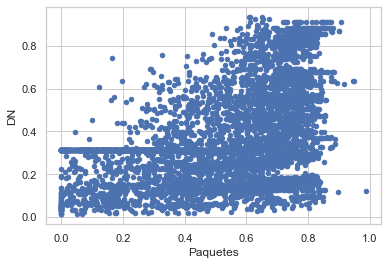

In [49]:
scatter_plot=data.plot.scatter(x= 'Paquetes', y='DN', cmap='viridis')
scatter_plot.plot()
axis.set_title('Ventas en cada operador')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


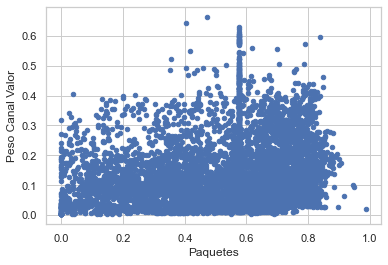

In [50]:
scatter_plot=data.plot.scatter(x= 'Paquetes', y='Peso Canal Valor', cmap='viridis')
scatter_plot.plot()
axis.set_title('Ventas en cada operador')
plt.show()

<AxesSubplot:xlabel='Peso Canal Volumen', ylabel='Destajo'>

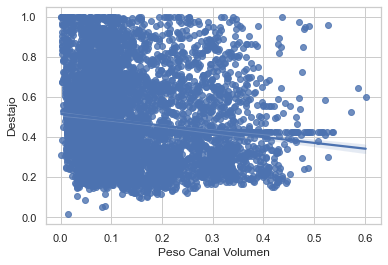

In [51]:
sns.regplot(x='Peso Canal Volumen', y='Destajo', data=data)

<AxesSubplot:>

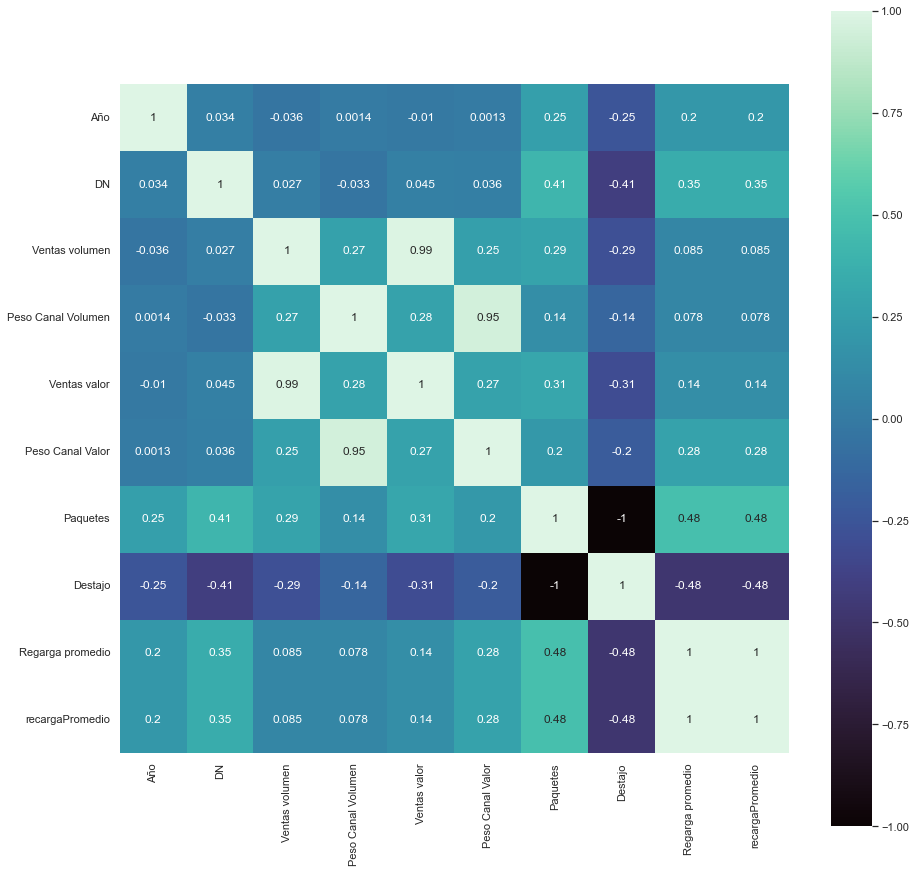

In [52]:
plt.figure(figsize=(15,15)) #Mapa de calor de la correlación de las variables del dataset
sns.heatmap(data.corr(), annot=True, square=True, cmap="mako")

#### Vamos a visualizar la correlación de los datos con un mapa de calor donde podemos evidenciar que en los colores claros existe poca correlación entre las variables, en los colores oscuros existe una correlación fuerte entre las variables o estan muy correlacionadas dichas variables entre si. Tambien vemos en los colores negros correlaciones negativas



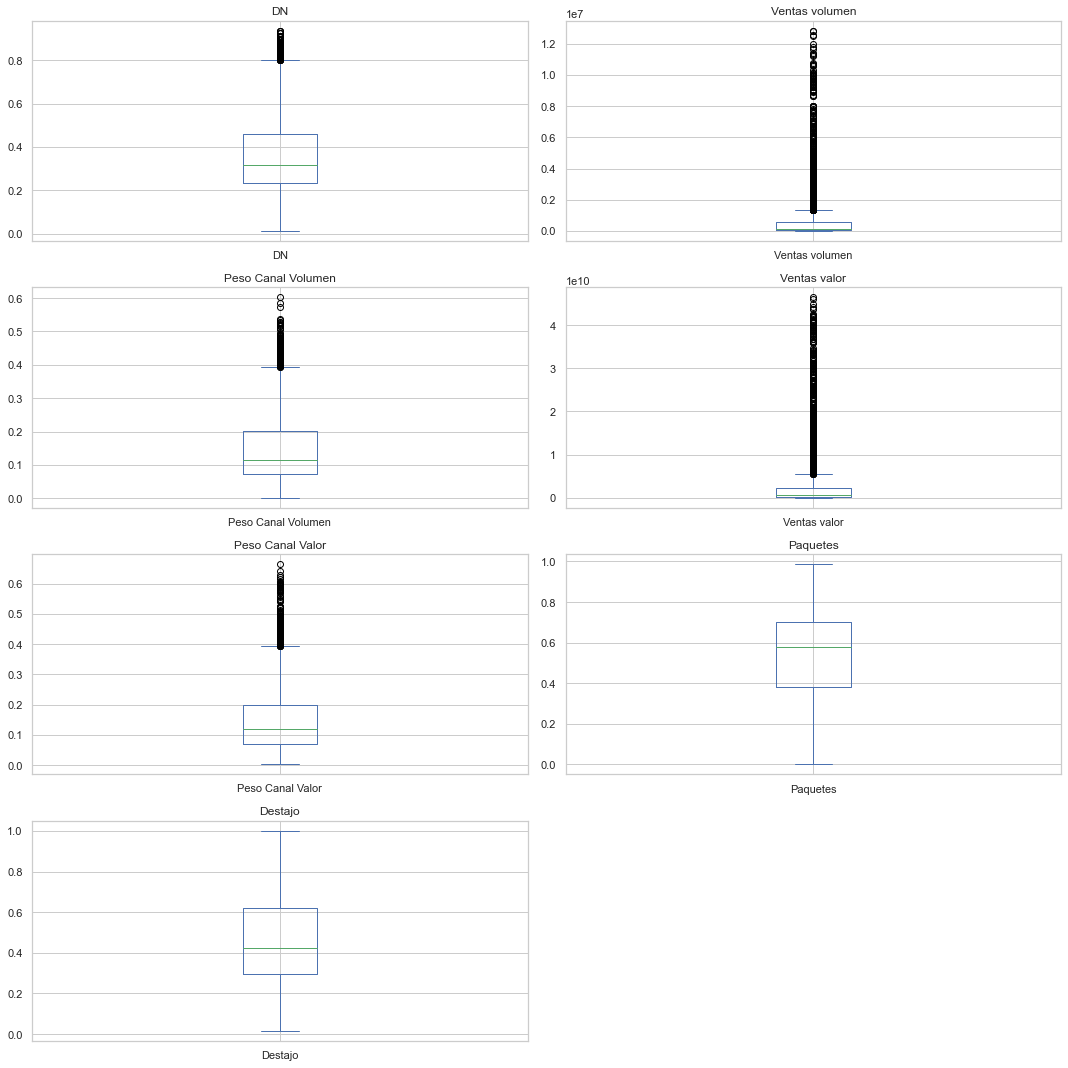

In [53]:
# Gráfica boxplot de cada variable para identificar los datos atípicos
plt.figure(figsize=(15,15))
      
plt.subplot(4,2,1)
data['DN'].plot.box(); 
plt.title("DN");

plt.subplot(4,2,2)
data['Ventas volumen'].plot.box(); 
plt.title("Ventas volumen");

plt.subplot(4,2,3)
data['Peso Canal Volumen'].plot.box(); 
plt.title("Peso Canal Volumen");

plt.subplot(4,2,4)
data['Ventas valor'].plot.box(); 
plt.title("Ventas valor");

plt.subplot(4,2,5)
data['Peso Canal Valor'].plot.box(); 
plt.title("Peso Canal Valor");

plt.subplot(4,2,6)
data['Paquetes'].plot.box(); 
plt.title("Paquetes");

plt.subplot(4,2,7)
data['Destajo'].plot.box(); 
plt.title("Destajo");

plt.tight_layout()

#### En la linea verde podemos ver la ultura media, los bordes de la caja en el centro indican el rango intercuartil de los datos, entre los percentiles 25 y 75, los bigotes de los extremos de las barras delgadas indican el tamaño del rango intercuantil más allá de los percentiles 75 y 25. Esto abarca aproximadamente el 99 por ciento de la distribución si los datos son gaussianos o normales. Los puntos que aprecen más allá de los bigotes son valores atípicos 